# SAFT-VR-Mie with polar contributions

In [1]:
import teqp
teqp.__version__

'0.18.0'

In [2]:
import numpy as np, io
import matplotlib.pyplot as plt, pandas
import math, json

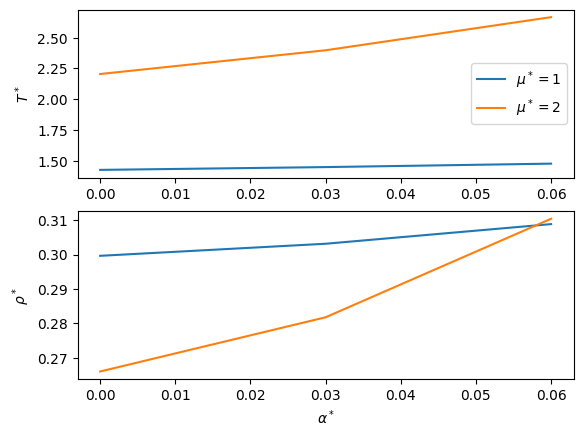

In [3]:
# These values are not important, get something on the right order of magnitude
ek = 100 # [K]
sigma_m = 1e-10
                     
N_A = 6.022e23
fig, (ax1, ax2) = plt.subplots(2, 1)

kB = 1.380649e-23 # Boltzmann's constant, J/K
epsilon_0 = 8.8541878128e-12 # Vacuum permittivity
k_e = 1.0/(4.0*np.pi*epsilon_0*sigma_m**3)

polar_model = 'GrayGubbins+GubbinsTwu'

for mustar in [1, 2]:
    x,TT,DD = [],[],[]
    for alphastar in [0.0, 0.03, 0.06]:

        alpha_m3 = alphastar*sigma_m**3

        rhostar_guess = 0.27
        Tstar_guess = 1.5
        mu_Cm = (ek*kB/k_e)**0.5*mustar
        j = {
            "kind": 'SAFT-VR-Mie',
            "model": {
                "polar_model": polar_model,
                "polar_flags": {
                    "polarizable": {
                        "alpha_symm / m^3": [alpha_m3], 
                        "alpha_asymm / m^3": [0.0]
                    }
                },
                "coeffs": [{
                    "name": "PolarizableStockmayer",
                    "BibTeXKey": "me",
                    "m": 1.0,
                    "epsilon_over_k": ek, # [K]
                    "sigma_m": sigma_m,
                    "lambda_r": 12.0,
                    "lambda_a": 6.0,
                    "mu_Cm": mu_Cm,
                    "nmu": 1.0
                }]
            }
        }
        model = teqp.make_model(j)

        T, rho = model.solve_pure_critical(Tstar_guess*ek, rhostar_guess/(N_A*sigma_m**3))
        # Store the values
        x.append(alphastar)
        TT.append(T/ek)
        DD.append(rho*N_A*sigma_m**3)
        # Update the guess for the next calculation
        Tstar_guess = TT[-1]
        rhostar_guess = DD[-1]
#         print(TT[-1], DD[-1])

    ax1.plot(x, TT, label=f'$\mu^*={mustar}$')
    ax2.plot(x, DD)
        
ax1.legend(loc='best')
ax1.set(ylabel=r'$T^*$')
ax2.set(xlabel=r'$\alpha^*$', ylabel=r'$\rho^*$')
plt.show()

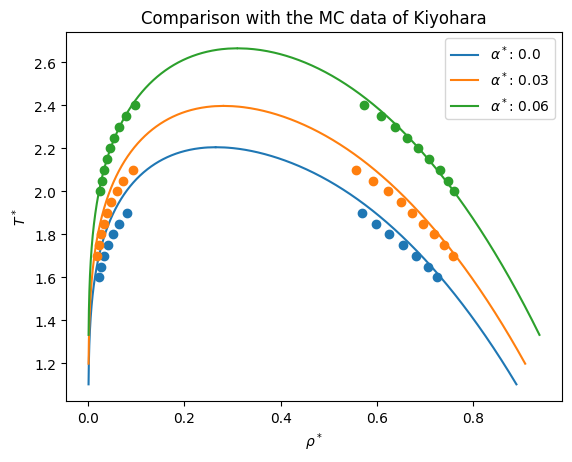

In [4]:
s = io.StringIO("""# Kiyohara JCP 1999; doi: 10.1063/1.473082
alpha* T* mu* p* rhog* rhol* ug* ul* deltah*
0.00 1.60 -7.177 0.0224 0.0222 0.726 -1.16 -10.16 9.97
0.00 1.65 -7.078 0.0300 0.0273 0.706 -1.28 -9.89 9.67
0.00 1.70 -6.986 0.0388 0.0335 0.682 -1.40 -9.58 9.28
0.00 1.75 -6.900 0.0490 0.0411 0.654 -1.53 -9.22 8.82
0.00 1.80 -6.822 0.0607 0.0507 0.626 -1.67 -8.87 8.30
0.00 1.85 -6.750 0.0741 0.0634 0.599 -1.86 -8.53 7.72
0.00 1.90 -6.683 0.0896 0.0811 0.569 -2.13 -8.17 6.98
0.03 1.70 -7.893 0.0233 0.0183 0.758 -1.11 -11.48 11.62
0.03 1.75 -7.783 0.0301 0.0222 0.741 -1.22 -11.21 11.30
0.03 1.80 -7.679 0.0379 0.0270 0.720 -1.34 -10.91 10.91
0.03 1.85 -7.582 0.0469 0.0327 0.697 -1.46 -10.58 10.48
0.03 1.90 -7.492 0.0572 0.0396 0.674 -1.58 -10.25 10.02
0.03 1.95 -7.407 0.0690 0.0480 0.650 -1.71 -9.92 9.53
0.03 2.00 -7.329 0.0823 0.0587 0.624 -1.87 -9.56 8.95
0.03 2.05 -7.255 0.0974 0.0730 0.593 -2.10 -9.16 8.21
0.03 2.10 -7.187 0.1146 0.0927 0.556 -2.44 -8.69 7.27
0.06 2.00 -8.695 0.0357 0.0232 0.761 -1.19 -13.00 13.30
0.06 2.05 -8.581 0.0440 0.0275 0.749 -1.31 -12.75 12.98
0.06 2.10 -8.471 0.0535 0.0325 0.732 -1.44 -12.44 12.57
0.06 2.15 -8.367 0.0641 0.0385 0.709 -1.58 -12.07 12.07
0.06 2.20 -8.270 0.0761 0.0455 0.686 -1.71 -11.69 11.54
0.06 2.25 -8.178 0.0895 0.0539 0.663 -1.86 -11.33 11.00
0.06 2.30 -8.092 0.1044 0.0644 0.639 -2.05 -10.95 10.36
0.06 2.35 -8.010 0.1211 0.0784 0.609 -2.30 -10.51 9.55
0.06 2.40 -7.934 0.1397 0.0969 0.573 -2.66 -9.99 8.53""")

df = pandas.read_csv(s, sep='\s+', engine='python', comment='#')

mustar = 2.0
for alphastar, gp in df.groupby('alpha*'):
    
    alpha_m3 = alphastar*sigma_m**3    
    
    j = {
        "kind": 'SAFT-VR-Mie',
        "model": {
            "polar_model": polar_model,
            "polar_flags": {
                "polarizable": {
                    "alpha_symm / m^3": [alpha_m3], 
                    "alpha_asymm / m^3": [0.0]
                }
            },
            "coeffs": [{
                "name": "PolarizableStockmayer",
                "BibTeXKey": "me",
                "m": 1.0,
                "epsilon_over_k": ek, # [K]
                "sigma_m": sigma_m,
                "lambda_r": 12.0,
                "lambda_a": 6.0,
                "mu_Cm": mu_Cm,
                "nmu": 1.0
            }]
        }
    }
    model = teqp.make_model(j)
    Tc, rhoc = model.solve_pure_critical(Tstar_guess*ek, rhostar_guess/(N_A*sigma_m**3))
    anc = teqp.build_ancillaries(model, Tc, rhoc, Tc/2.0, {})
    Tvec = np.linspace(Tc/2.0, Tc, 1000)
    
    line, = plt.plot(gp['rhol*'], gp['T*'], 'o')
    plt.plot(gp['rhog*'], gp['T*'], 'o', color=line.get_color())
    
    RHOL = np.array([anc.rhoL(T) for T in Tvec])
    RHOV = np.array([anc.rhoV(T) for T in Tvec])
    
    plt.plot(RHOL*N_A*sigma_m**3, Tvec/ek, '-', color=line.get_color(), label=rf'$\alpha^*$: {alphastar}')
    plt.plot(RHOV*N_A*sigma_m**3, Tvec/ek, '-', color=line.get_color())

plt.title('Comparison with the MC data of Kiyohara')
plt.xlabel(r'$\rho^*$')
plt.ylabel(r'$T^*$')
plt.legend();